In [101]:
%pwd

'C:\\Users\\sonaw\\OneDrive\\Desktop\\Projects\\Movie Analysis from IMDB'

In [102]:
import sqlite3
import pandas as pd
cnx = sqlite3.connect(r'C:\Users\sonaw\OneDrive\Desktop\Projects\Movie Analysis from IMDB\movie_data1.db')

In [103]:
df = pd.read_sql_query('SELECT * from imdb_top_250', cnx)
df.head()

,top250_id,title,rating,year,num_of_rating,director,writer,actors,meta_score,awards,run_time,genre,country,language,detailed_release_date,budget,usa_collection,worldwide_collection
0,1,The Shawshank Redemption,9.3,1994,"2,263,119",Frank Darabont,Stephen King,"Tim Robbins,Morgan Freeman,Bob Gunton",80.0,Nominated for 7 Oscars.,2h 22min,Drama,USA,English,14 October 1994 (India),"Budget:$25,000,000","$28,699,976","$28,815,245"
1,2,The Godfather,9.2,1972,"1,561,334",Francis Ford Coppola,Mario Puzo,"Marlon Brando,Al Pacino,James Caan",100.0,Won 3 Oscars.,2h 55min,Crime,USA,English,24 March 1972 (USA),"Budget:$6,000,000","$134,966,411","$246,120,974"
2,3,The Godfather: Part II,9.0,1974,"1,091,230",Francis Ford Coppola,Francis Ford Coppola,"Al Pacino,Robert De Niro,Robert Duvall",90.0,Won 6 Oscars.,3h 22min,Crime,USA,English,2 May 2020 (India),"Budget:$13,000,000","$47,834,595","$48,035,783"
3,4,The Dark Knight,9.0,2008,"2,227,824",Christopher Nolan,Jonathan Nolan,"Christian Bale,Heath Ledger,Aaron Eckhart",84.0,Won 2 Oscars.,2h 32min,Action,USA,English,18 July 2008 (India),"Budget:$185,000,000","$535,234,033","$1,037,854,631"
4,5,12 Angry Men,8.9,1957,"663,167",Sidney Lumet,Reginald Rose,"Henry Fonda,Lee J. Cobb,Martin Balsam",96.0,Nominated for 3 Oscars.,1h 36min,Crime,USA,English,10 April 1957 (USA),"Budget:$350,000",Information not available,$576


# 1: Movie Rating and Year
Which year has most movies in top 250 (Find top 5)

Which year has least movies in top 250 (Find bottom 5)

In [104]:
df['rating'] = df['rating'].astype('float')
df['year'] = df['year'].astype('int')
df_1 = df[['year', 'title']]
df_1 = df_1.groupby(['year']).count()

df_2 = df[['year', 'rating']]
df_2 = df_2.groupby(['year']).sum()

df_1['sum_of_rating'] = df_2['rating']
df_1 = df_1.sort_values(['title'], ascending = False)
df_1['average_rating'] = df_1['sum_of_rating'] / df_1['title']
df_1['average_rating'] = df_1['average_rating'].round(2)
df_1['title'] = df_1['title'].astype('int')
df_1 = df_1[df_1['title'] >= 5]
df_2 = df_1.sort_values(['average_rating'], ascending = False)
df_2

,title,sum_of_rating,average_rating
year,,,
1994,5,44.0,8.80
1999,5,42.5,8.50
2001,5,41.9,8.38
1997,5,41.8,8.36
2006,5,41.8,8.36
2018,5,41.7,8.34
2010,5,41.7,8.34
1957,7,58.3,8.33
2003,5,41.6,8.32


# Years with highest number of movies in top 250:
1995 (8 Movies), 2019 (7 Movies), 1957 (7 Movies), 2004 (7 Movies), 2009 (6 Movies)

# Years with highest average rating for years having 5 or more movies in top 250
1994 (average rating = 8.80, 5 movies), 1999 (average rating = 8.50, 5 movies), 2001 (average rating = 8.38, 5 movies), 1997 (average rating = 8.36, 5 movies), 2006 (average rating = 8.36, 5 movies)

# Conclusion:
1995 and 1994 were most successful years for movies

# 2. Movie Rating Statistics
What is average IMDB rating of top 250 movies? What is median? What is standard deviation?

In [105]:
df_1 = df[['rating']].astype('float')
df_1.describe().round(2)

,rating
count,250.00
mean,8.30
std,0.23
min,8.00
25%,8.10
50%,8.20
75%,8.40
max,9.30


# IMDB top 250 movies ratings statastics
mean	8.30
std	0.23
min	8.00
25%	8.10
50%	8.20
75%	8.40
max	9.30

# 3. Top Directors in IMDB Top 250 List
Which director has highest number of movies in top 250?

What is the average movie rating for top 10 directors?

In [106]:
df_1 = df[['top250_id','director', 'rating']]
df_2 = df_1.groupby(['director']).count()
df_3 = df_1.groupby(['director']).sum()
df_2 = df_2.drop('rating', axis = 1)
df_2['sum_of_rating'] = df_3['rating']
df_2 = df_2.sort_values(['top250_id'], ascending = False)
df_2['average_rating'] = df_2['sum_of_rating'] / df_2['top250_id']
df_2['average_rating'] = df_2['average_rating'].round(2)
df_2[:10]

,top250_id,sum_of_rating,average_rating
director,,,
Akira Kurosawa,7,58.0,8.29
Martin Scorsese,7,58.3,8.33
Christopher Nolan,7,59.9,8.56
Stanley Kubrick,7,58.2,8.31
Alfred Hitchcock,6,49.8,8.30
Steven Spielberg,6,50.3,8.38
Charles Chaplin,6,50.1,8.35
Billy Wilder,5,41.6,8.32
Hayao Miyazaki,5,41.5,8.30


# Directors with most number of movies in top 250:
1. Akira Kurosawa: 7 movies (average rating: 8.29)
2. Martin Scorsese: 7 movies (average rating: 8.33)
3. Christopher Nolan: 7 movies (average rating: 8.56)
4. Stanley Kubrick: 7 movies (average rating: 8.31)
5. Alfred Hitchcock: 6 movies (average rating: 8.30)
6. Steven Spielberg: 6 movies (average rating: 8.38)
7. Charles Chaplin: 6 movies (average rating: 8.35)
8. Billy Wilder: 5 movies (average rating: 8.32)
9. Hayao Miyazaki: 5 movies (average rating: 8.30)
10. Quentin Tarantino: 5 movies (average rating: 8.40)

# Conclusion:
Most of the iconic directors are in top 10 list. It makes sense that Nolan and Tarantino has highest average considering they are current generation directors and are mass favourites

# 4. Top Actors in IMDB Top 250 List
Which actor has appeared in most top 250 movies?

What is the average movie rating of the top 10 actors?

In [107]:
df_1 = df
list_of_actors = []
for i in df_1['actors'].tolist():
    j = i.split(',')
    for actor in j:
        list_of_actors.append(actor)

actors = {}

for i in list_of_actors:
    if i not in actors:
        actors[i] = 1
    else:
        actors[i] += 1
actors = {k:v for k, v in sorted(actors.items(), reverse = True, key = lambda item: item[1])}

# Printing top 10 actors

print('List of 10 actors with highest number of movies in Top 250')
for i in list(actors.keys())[:10]:
    print(i, actors[i])
    
top_actors_list = list(actors.keys())[:10]
actors_rating = {}

for i in top_actors_list:
    df_2 = df_1['actors'].apply(lambda x: x if i in x else None)
    df_1['actors_rating'] = df_2
    temp = df_1.dropna()
    actors_rating[i] = round(temp['rating'].mean(), 2)
    df_1.drop(columns = ['actors_rating'])
actors_rating = {k:v for k, v in sorted(actors_rating.items(), reverse = True, key = lambda item: item[1])}
print()
print('List of top 10 actors sorted with average movie rating')
for i, j in actors_rating.items():
    print(i, j)

List of 10 actors with highest number of movies in Top 250
Robert De Niro 9
Tom Hanks 6
Leonardo DiCaprio 6
Harrison Ford 6
Charles Chaplin 6
Christian Bale 5
Clint Eastwood 5
Toshirô Mifune 5
Morgan Freeman 4
Al Pacino 4

List of top 10 actors sorted with average movie rating
Al Pacino 8.68
Morgan Freeman 8.55
Tom Hanks 8.45
Christian Bale 8.44
Harrison Ford 8.4
Charles Chaplin 8.4
Toshirô Mifune 8.4
Robert De Niro 8.39
Leonardo DiCaprio 8.37
Clint Eastwood 8.3


# Top 10 actors with most movies in Top 250:
Robert De Niro 9,
Tom Hanks 6,
Leonardo DiCaprio 6,
Harrison Ford 6,
Charles Chaplin 6,
Christian Bale 5,
Clint Eastwood 5,
Toshirô Mifune 5,
Morgan Freeman 4,
Al Pacino 4

# Top 10 actors arranged in decreasing order according to average movie rating
Al Pacino 8.68
Morgan Freeman 8.55
Tom Hanks 8.45
Christian Bale 8.44
Harrison Ford 8.4
Charles Chaplin 8.4
Toshirô Mifune 8.4
Robert De Niro 8.39
Leonardo DiCaprio 8.37
Clint Eastwood 8.3

# Conclusion:

Most of the big actors names appear in the above finding. A surprising missout is 'Jack Nicholson'

# 5. Top Writers in IMDB Top 250 List
Which writer has appeared in most top 250 movies?

In [108]:
df_1 = df[['top250_id', 'writer']]
df_1 = df_1.groupby(['writer']).count()
df_1 = df_1.sort_values(['top250_id'], ascending = False)
df_1[:10]

,top250_id
writer,
Charles Chaplin,6
Stanley Kubrick,6
Quentin Tarantino,5
Hayao Miyazaki,5
Stephen King,4
Jonathan Nolan,4
Ingmar Bergman,4
Akira Kurosawa,4
Pete Docter,3


# Writers with most number of movies in top 250
Charles Chaplin: 6 movies,
Stanley Kubrick: 6 movies,
Quentin Tarantino: 5 movies,
Hayao Miyazaki: 5 movies,
Stephen King: 4 movies,
Jonathan Nolan: 4 movies,
Ingmar Bergman: 4 movies,
Akira Kurosawa: 4 movies,
Pete Docter: 3 movies,
James Cameron: 3 movies

# Interesting thing is most of the writers are writer + directors!!

# 6. Correlation between Metacritic Score and IMDB rating

In [109]:
df_1 = df[['top250_id', 'title', 'meta_score']]
df_1 = df_1.dropna()
mean_meta_score = round(df_1['meta_score'].mean(), 2)

df_1['meta_score'].describe().round(2)

count    207.00
mean      83.42
std       10.17
min       61.00
25%       76.00
50%       85.00
75%       91.00
max      100.00
Name: meta_score, dtype: float64

# Metacritic Score Statistics

mean      83.42
std       10.17
min       61.00
25%       76.00
50%       85.00
75%       91.00
max      100.00

# Lets compare this with imdb rating score statistics

mean	8.30
std	0.23
min	8.00
25%	8.10
50%	8.20
75%	8.40
max	9.30

<IPython.core.display.Javascript object>


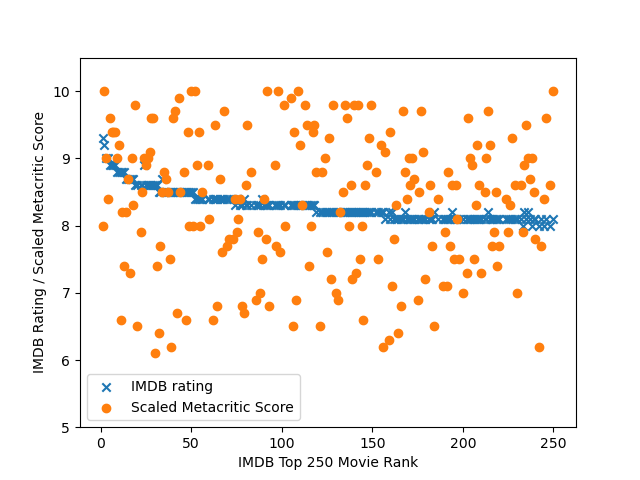

In [110]:
# Plot of scaled metacritic score and imdb rating
%matplotlib notebook
import matplotlib.pyplot as plt

df_1 = df[['top250_id', 'rating', 'meta_score']]
df_1 = df_1.dropna()
df_1['scaled_meta_score'] = df_1['meta_score'] / 10

plot1 = plt.scatter(df_1['top250_id'], df_1['rating'], marker = 'x')
plot2 = plt.scatter(df_1['top250_id'], df_1['scaled_meta_score'], marker = 'o')
plt.xlabel('IMDB Top 250 Movie Rank')
plt.ylabel('IMDB Rating / Scaled Metacritic Score')
plt.legend((plot1, plot2), ('IMDB rating', 'Scaled Metacritic Score'), loc = 'lower left')
plt.ylim(5, 10.5)
plt.show()

# Conclusion:
Above graph concludes that there is no correlation between IMDB rating and Metacritic score. Popular movies are not always critics favourite.

# 7. Number of ratings vs Rank of Movie

<IPython.core.display.Javascript object>


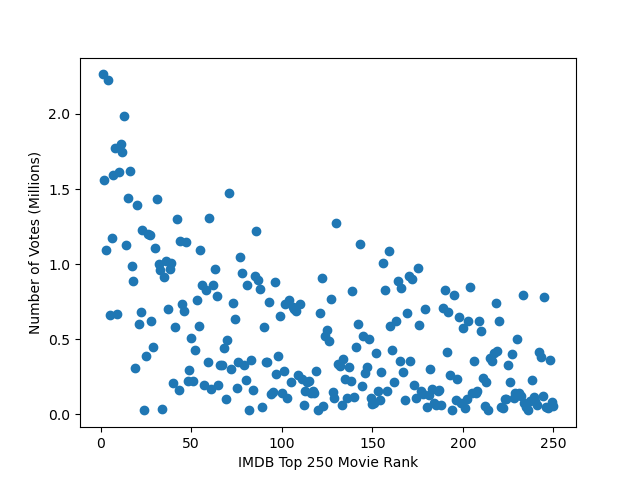

In [111]:
df_1 = df
df_5 = pd.DataFrame()
df_5['num_of_rating'] = df_1['num_of_rating'].apply(lambda x: int(x.replace(',', '')))
df_5['top250_id'] = df_1['top250_id']
df_5['num_of_rating'] = df_5['num_of_rating'] / 1000000
plt.figure()
plt.scatter(df_5['top250_id'], df_5['num_of_rating'])
plt.xlabel('IMDB Top 250 Movie Rank')
plt.ylabel('Number of Votes (Millions)')
plt.show()

# Conclusion
The number of votes decrease as rank of movie decreases. Top rated movies are most watched / most rated.

# Classification into Genre

In [112]:
df_1 = df[['top250_id', 'genre']]
df_1 = df_1.groupby(['genre']).count()

df_2 = df[['rating', 'genre']]
df_2 = df_2.groupby(['genre']).sum()
df_1['total_rating'] = df_2['rating']
df_1['average_rating'] = df_1['total_rating'] / df_1['top250_id']
df_1['average_rating'] = df_1['average_rating'].round(2)
df_1 = df_1.sort_values(['top250_id'], ascending = False)
df_1

,top250_id,total_rating,average_rating
genre,,,
Drama,73,604.5,8.28
Action,38,317.2,8.35
Crime,38,317.9,8.37
Comedy,25,206.9,8.28
Adventure,22,181.9,8.27
Biography,22,182.1,8.28
Animation,21,173.5,8.26
Mystery,4,33.3,8.32
Horror,3,25.0,8.33


# Classification of movies into genre:

Drama	73

Action	38

Crime	38

Comedy	25

Adventure	22

Biography	22

Animation	21

Mystery	4

Horror	3

Western	3

Film-Noir	1


# Conclusion
There are movies of 11 distinct genre in top 250 list.

Expected genre like Drama, Action and Crime at the top. Surprised to see Western and Film Noir at the bottom.

Crime and action genre has highest average rating (8.35 and 8.37 respectively) among top 5 genre. This makes sense as these are genre liked by majority population.

Western has average of 8.53. However, there are only 3 movies in top 250 of this genre. The Good, Bad and Ugly (which is in top 10), influences the high average.

# Classification by Country and Language

In [113]:
df_1 = df[['top250_id', 'country']]
df_1 = df_1.groupby(['country']).count()
df_1

df_2 = df[['rating', 'country']]
df_2 = df_2.groupby(['country']).sum()
df_1['total_rating'] = df_2['rating']
df_1['average_rating'] = df_1['total_rating'] / df_1['top250_id']
df_1['average_rating'] = df_1['average_rating'].round(2)
df_1 = df_1.sort_values(['top250_id'], ascending = False)

df_1

,top250_id,total_rating,average_rating
country,,,
USA,140,1165.7,8.33
UK,25,205.7,8.23
Japan,16,133.3,8.33
France,10,82.2,8.22
India,9,74.8,8.31
Germany,7,57.7,8.24
Italy,6,51.0,8.50
Sweden,4,32.6,8.15
South Korea,4,33.2,8.30


# 10 countries with highest number of movies in top 250
USA	140
UK	25
Japan	16
France	10
India	9
Germany	7
Italy	6
Sweden	4
South Korea	4
Australia	3

# Average ratings of movies grouped by countries
USA            8.33
UK             8.23
Japan          8.33
France         8.22
India          8.31
Germany        8.24
Italy          8.50
Sweden         8.15
South Korea    8.30
Australia      8.10

# 10 countries with lowest number of movies in top 250
West Germany	2
Argentina	2
Iran	2
Canada	2
Lebanon	1
Ireland	1
Hong Kong	1
Denmark	1
Brazil	1
Algeria	1

In [114]:
df_1 = df[['top250_id', 'language']]
df_1 = df_1.groupby(['language']).count()
df_1 = df_1.sort_values(['top250_id'], ascending = False)
df_1[:10]

,top250_id
language,
English,180
Japanese,16
French,10
Hindi,9
Italian,6
Spanish,5
Swedish,4
German,4
Korean,4


# Distribution of movies as per language

Follows similar disctribution as that of countries:

English	180
Japanese	16
French	10
Hindi	9
Italian	6
Spanish	5
Swedish	4
German	4
Korean	4
Persian	2

# Conclusion
1. There are movies from 25 different countries in the top 250 list
2. Apart from USA; UK, Japan and France has equal to or more than 10 movies in the list. All the countries have reputed and well known film industry. It makes sense for those countries to have more movies.
3. India has huge population and indian movie industry also attract international crowd. It makes sense to have high indian movies in database prepared with individual user ratings.
4. Relatively surprised with South Korea having only 4 movies.
5. Very less number of movies from South America.

# Financial Analysis (Budget, Collection, Profits)

In [115]:
df_1 = df[['top250_id', 'budget']]
df_2 = pd.DataFrame()
df_2['budget'] = df_1['budget'].apply(lambda x: x[7:].replace(',','') if x != 'Information not available' else None)
df_2['year'] = df['year']
df_2['top250_id'] = df['top250_id']
df_2 = df_2.dropna()
# df_2['budget'] = df_2['budget'].apply(lambda x: x[1:] if x.startswith('$') else x)


In [116]:
df_1 = pd.DataFrame()
df_1['runtime'] = df['run_time'].apply(lambda x: x.split())
df_1['hours'] = df_1['runtime']

10 Movies with highest budget (Millions)
Avengers: Endgame 2019 363.12
Avengers: Infinity War 2018 333.97
The Dark Knight Rises 2012 292.91
Toy Story 3 2010 243.8
The Dark Knight 2008 234.62
WALL·E 2008 228.28
Up 2009 217.59
Batman Begins 2005 201.88
How to Train Your Dragon 2010 201.13
Inception 2010 195.04
************************************************************
10 Movies with highest USA collection (Millions)
Star Wars 1977 1080.21
Gone with the Wind 1939 998.83
Avengers: Endgame 2019 875.54
The Lion King 1994 707.49
Avengers: Infinity War 2018 706.24
Jurassic Park 1993 688.85
The Dark Knight 2008 678.81
Star Wars: Episode VI - Return of the Jedi 1983 643.57
Star Wars: Episode V - The Empire Strikes Back 1980 642.28
Forrest Gump 1994 552.99
************************************************************
10 Movies with highest Worldwide collection (Millions)
Avengers: Endgame 2019 2853.76
Avengers: Infinity War 2018 2131.11
Gone with the Wind 1939 2000.88
Star Wars 1977 1817.19
Jura

<IPython.core.display.Javascript object>


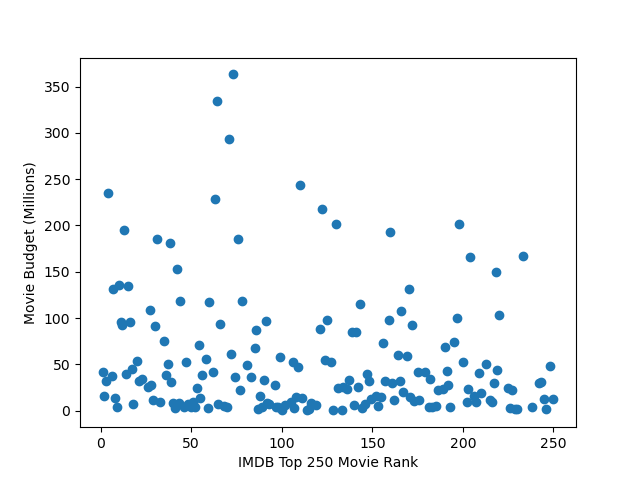

<IPython.core.display.Javascript object>


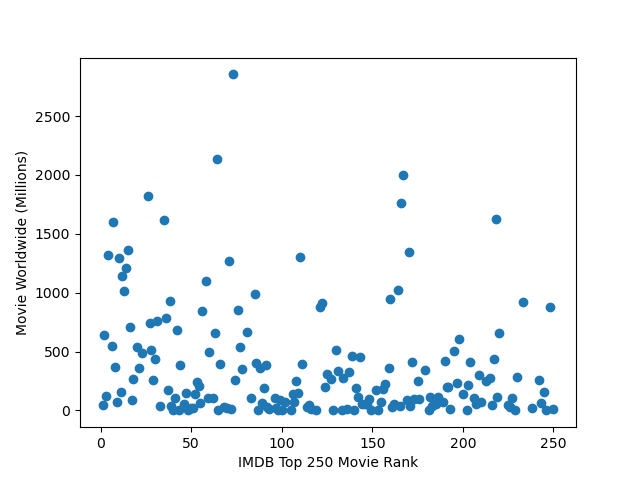

<IPython.core.display.Javascript object>


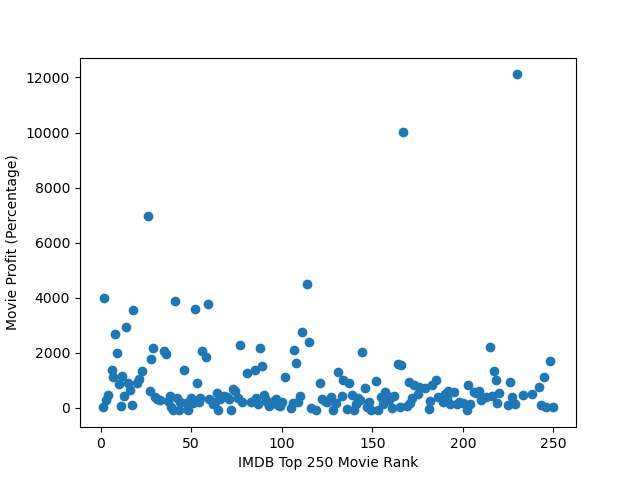

Text(0, 0.5, 'Movie Profit (Percentage)')

In [117]:
df_copy = df[['budget', 'usa_collection', 'worldwide_collection', 'year', 'top250_id', 'title']].copy()
df_copy.loc[:, 'budget'] = df_copy['budget'].apply(lambda x: x[7:] if x != 'Information not available' else None)
df_copy.loc[:, 'usa_collection'] = df_copy['usa_collection'].apply(lambda x: x if x != 'Information not available' else None)
df_copy.loc[:, 'worldwide_collection'] = df_copy['worldwide_collection'].apply(lambda x: x if x != 'Information not available' else None)
df_copy = df_copy.dropna()
df_copy.loc[:, 'budget'] = df_copy['budget'].apply(lambda x: x if x.startswith('$') else None)
df_copy.loc[:, 'usa_collection'] = df_copy['usa_collection'].apply(lambda x: x if x.startswith('$') else None)
df_copy.loc[:, 'worldwide_collection'] = df_copy['worldwide_collection'].apply(lambda x: x if x.startswith('$') else None)
df_copy = df_copy.dropna()

df_copy.loc[:, 'budget'] = [int(x[1:].replace(',', '')) for x in df_copy.budget]
df_copy.loc[:, 'usa_collection'] = [int(x[1:].replace(',', '')) for x in df_copy.usa_collection]
df_copy.loc[:, 'worldwide_collection'] = [int(x[1:].replace(',', '')) for x in df_copy.worldwide_collection]

df_copy['year_difference'] = 2020 - df_copy['year']
df_copy['year_difference'] = df_copy['year_difference'].astype('int')

df_copy = df_copy.dropna()

# Assuming average inflation rate as 2%
df_copy.loc[:, 'budget_inflation_corrected'] = [(x * pow((1.020), y)) / 1000000 for x, y in zip(df_copy.budget, df_copy.year_difference)]
df_copy.loc[:, 'usa_collection_inflation_corrected'] = [(x * pow((1.020), y)) / 1000000 for x, y in zip(df_copy.usa_collection, df_copy.year_difference)]
df_copy.loc[:, 'worldwide_collection_inflation_corrected'] = [(x * pow((1.020), y)) / 1000000 for x, y in zip(df_copy.worldwide_collection, df_copy.year_difference)]
df_copy['worldwide_profit'] = df_copy.worldwide_collection_inflation_corrected - df_copy.budget_inflation_corrected
df_copy['worldwide_profit_percentage'] = ((df_copy.worldwide_collection_inflation_corrected - df_copy.budget_inflation_corrected) / df_copy.budget_inflation_corrected) * 100
df_copy = df_copy.round(2)

# Finding top 10 movies with highest budget
df_copy = df_copy.sort_values(['budget_inflation_corrected'], ascending = False)
print('10 Movies with highest budget (Millions)')
[print(x, y, z) for x, y, z in zip(df_copy.title[:10], df_copy.year[:10], df_copy.budget_inflation_corrected[:10])]

# Finding top 10 movies with highest US collection
df_copy = df_copy.sort_values(['usa_collection_inflation_corrected'], ascending = False)
print('************************************************************')
print('10 Movies with highest USA collection (Millions)')
[print(x, y, z) for x, y, z in zip(df_copy.title[:10], df_copy.year[:10], df_copy.usa_collection_inflation_corrected[:10])]

# Finding top 10 movies with highest worldwide collection
df_copy = df_copy.sort_values(['worldwide_collection_inflation_corrected'], ascending = False)
print('************************************************************')
print('10 Movies with highest Worldwide collection (Millions)')
[print(x, y, z) for x, y, z in zip(df_copy.title[:10], df_copy.year[:10], df_copy.worldwide_collection_inflation_corrected[:10])]

# Finding top 10 movies with highest worldwide profit
df_copy = df_copy.sort_values(['worldwide_profit'], ascending = False)
print('************************************************************')
print('10 Movies with highest Worldwide Profit (Millions)')
[print(x, y, z) for x, y, z in zip(df_copy.title[:10], df_copy.year[:10], df_copy.worldwide_profit[:10])]


# Finding top 10 movies with highest worldwide profit percentage
df_copy = df_copy.sort_values(['worldwide_profit_percentage'], ascending = False)
print('************************************************************')
print('10 Movies with highest Worldwide Profit Percentage (Millions)')
[print(x, y, z) for x, y, z in zip(df_copy.title[:10], df_copy.year[:10], df_copy.worldwide_profit_percentage[:10])]


# Finding top 10 movies with lowest worldwide profit percentage
df_copy = df_copy.sort_values(['worldwide_profit_percentage'], ascending = True)
print('************************************************************')
print('10 Movies with lowest Worldwide Profit Percentage (Millions)')
[print(x, y, z) for x, y, z in zip(df_copy.title[:10], df_copy.year[:10], df_copy.worldwide_profit_percentage[:10])]

# Plot of movie budget, collections and profit vs its ranking

plt.figure()

plt.scatter(df_copy['top250_id'], df_copy['budget_inflation_corrected'])
plt.xlabel('IMDB Top 250 Movie Rank')
plt.ylabel('Movie Budget (Millions)')

plt.figure()
plt.scatter(df_copy['top250_id'], df_copy['worldwide_collection_inflation_corrected'])
plt.xlabel('IMDB Top 250 Movie Rank')
plt.ylabel('Movie Worldwide (Millions)')


plt.figure()
plt.scatter(df_copy['top250_id'], df_copy['worldwide_profit_percentage'])
plt.xlabel('IMDB Top 250 Movie Rank')
plt.ylabel('Movie Profit (Percentage)')

# Financial Analysis Summary:
# 10 Movies with highest budget (Millions)
Avengers: Endgame 2019 363.12

Avengers: Infinity War 2018 333.97

The Dark Knight Rises 2012 292.91

Toy Story 3 2010 243.8

The Dark Knight 2008 234.62

WALL·E 2008 228.28

Up 2009 217.59

Batman Begins 2005 201.88

How to Train Your Dragon 2010 201.13

Inception 2010 195.04
# 10 Movies with highest USA collection (Millions)
Star Wars 1977 1080.21

Gone with the Wind 1939 998.83

Avengers: Endgame 2019 875.54

The Lion King 1994 707.49

Avengers: Infinity War 2018 706.24

Jurassic Park 1993 688.85

The Dark Knight 2008 678.81

Star Wars: Episode VI - Return of the Jedi 1983 643.57

Star Wars: Episode V - The Empire Strikes Back 1980 642.28

Forrest Gump 1994 552.99

# 10 Movies with highest Worldwide collection (Millions)
Avengers: Endgame 2019 2853.76

Avengers: Infinity War 2018 2131.11

Gone with the Wind 1939 2000.88

Star Wars 1977 1817.19

Jurassic Park 1993 1762.81

Harry Potter and the Deathly Hallows: Part 2 2011 1627.56

The Lion King 1994 1620.73

The Lord of the Rings: The Return of the King 2003 1599.05

The Lord of the Rings: The Two Towers 2002 1358.56

Finding Nemo 2003 1348.24

# 10 Movies with highest Worldwide Profit (Millions)

Avengers: Endgame 2019 2490.64

Gone with the Wind 1939 1981.1

Avengers: Infinity War 2018 1797.15

Star Wars 1977 1791.42

Jurassic Park 1993 1655.27

The Lion King 1994 1545.42

Harry Potter and the Deathly Hallows: Part 2 2011 1478.18

The Lord of the Rings: The Return of the King 2003 1467.43

The Lord of the Rings: The Two Towers 2002 1224.3

Finding Nemo 2003 1216.61

# 10 Movies with highest Worldwide Profit Percentage (Millions)

Rocky 1976 12111.99

Gone with the Wind 1939 10016.99

Star Wars 1977 6950.19

Jodaeiye Nader az Simin 2011 4485.22

The Godfather 1972 4002.02

Psycho 1960 3865.56

The Lives of Others 2006 3767.85

Rear Window 1954 3603.2

One Flew Over the Cuckoo's Nest 1975 3533.25

Star Wars: Episode V - The Empire Strikes Back 1980 2948.07

# 10 Movies with lowest Worldwide Profit Percentage (Millions)
Dial M for Murder 1954 -98.66

City Lights 1931 -96.93

The Treasure of the Sierra Madre 1948 -92.82

Mr. Smith Goes to Washington 1939 -92.38

All About Eve 1950 -89.25

Hotaru no haka 1988 -86.03

Sunset Blvd. 1950 -82.9

Once Upon a Time in America 1984 -81.76

Rashômon 1950 -81.28

To Kill a Mockingbird 1962 -70.04

# Conclusion:
Avengers and other action movies predictably appear in top of budget and collections / profit. There are lots of old movies in movies with lowest profit. This might be due to inaccuracy in data on IMDB / not including TV collections etc.